In [1]:
import pandas as pd


## At first we read the csv file . I have named the csv file as dataset.csv

In [2]:
df=pd.read_csv("dataset.csv")

## Now i drop some columns which are not required like url

In [3]:
column_names=["posturl","postcontent","profileurl","videourl","sharedposturl","url","language",]
df=df.drop(columns=column_names,axis=1,inplace=True)

## Here i visualize the data using histogram as well as correlation matrix. Here correlation matrix is very important because we can get to know about the varibles that has effect on the target variable and the rest of the prediction is done with regards with correlation matrix


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

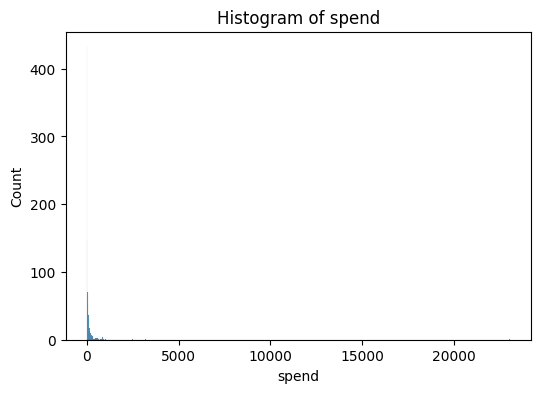

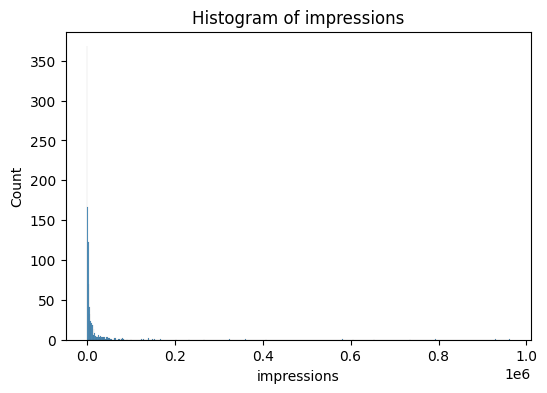

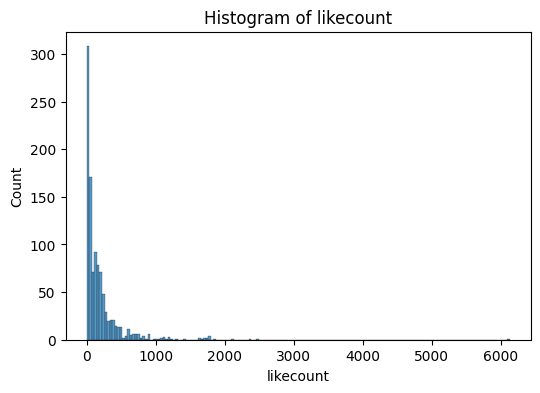

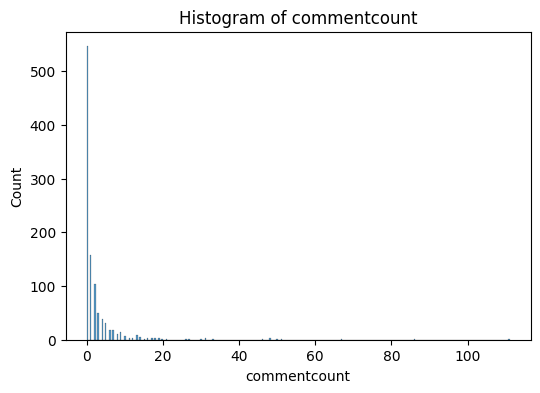

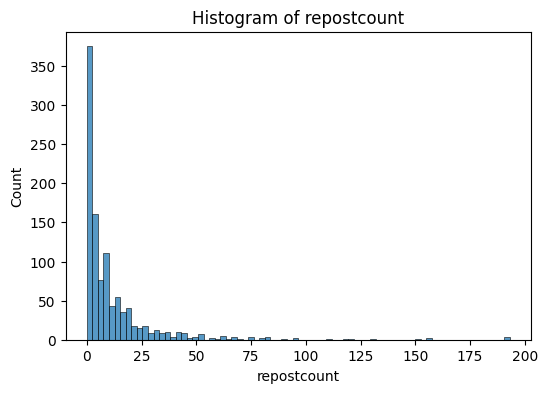

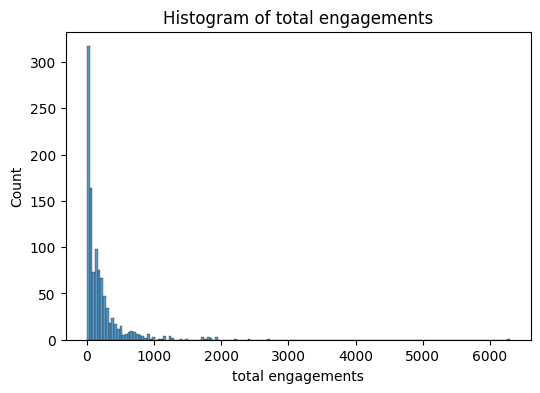

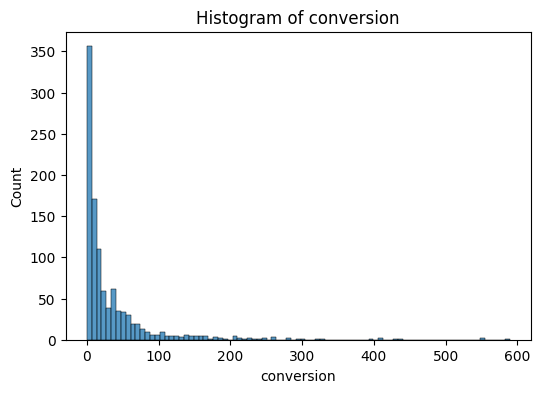

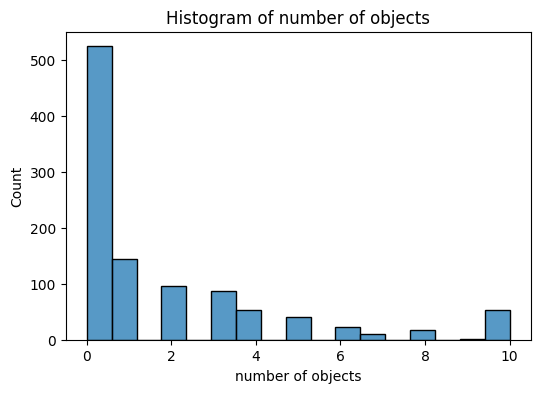

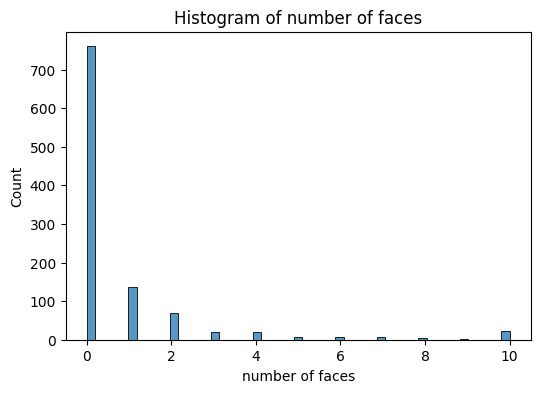

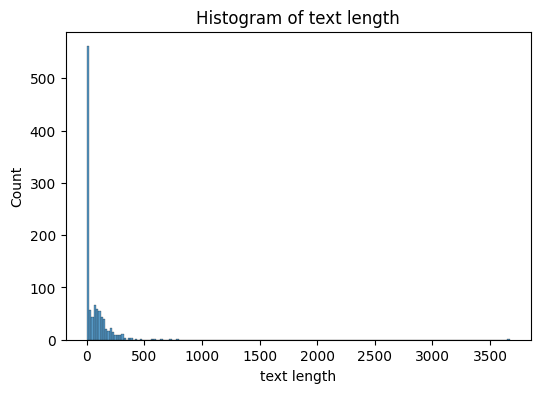

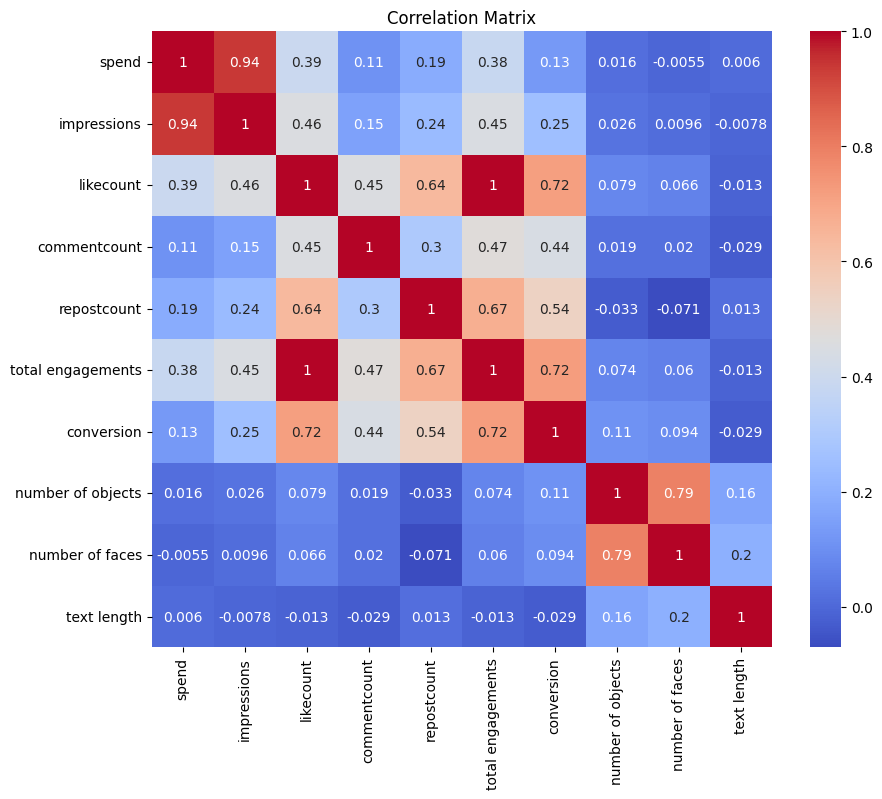

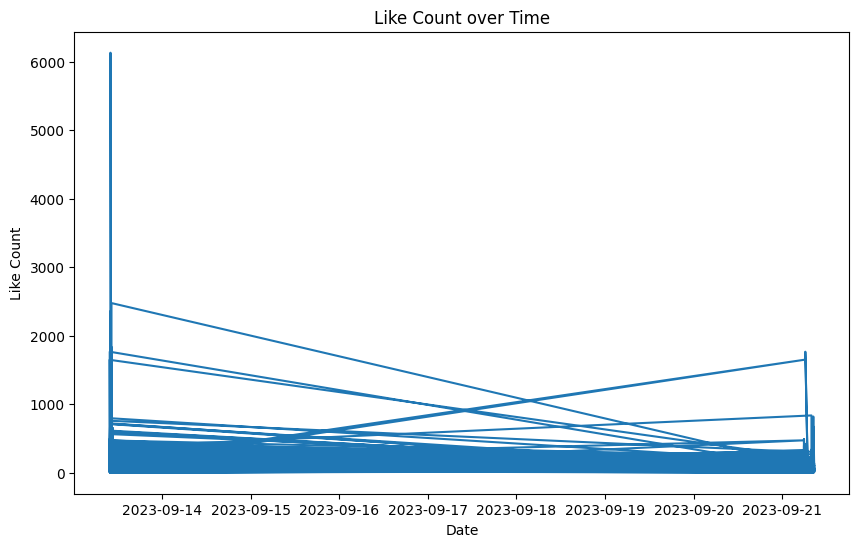

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('dataset.csv')


print(data.info())
print(data.head())


data.fillna(0, inplace=True)

numeric_features = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion','number of objects','number of faces','text length']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature])
    plt.title(f'Histogram of {feature}')
    plt.show()


numeric_data = data[numeric_features]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


data['created_at'] = pd.to_datetime(data['created_at'])
data.set_index('created_at', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data['likecount'])
plt.title('Like Count over Time')
plt.xlabel('Date')
plt.ylabel('Like Count')
plt.show()






## here is separatly plotted the histogram because string values cannot be converted into float values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

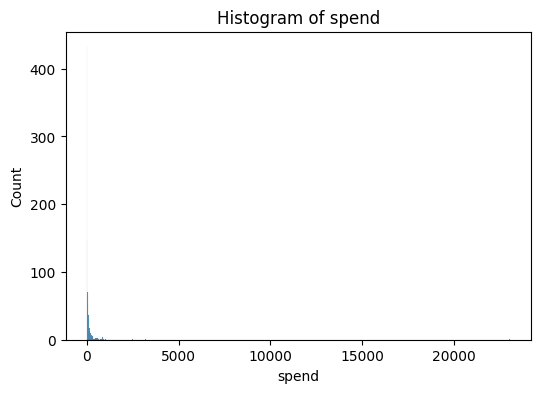

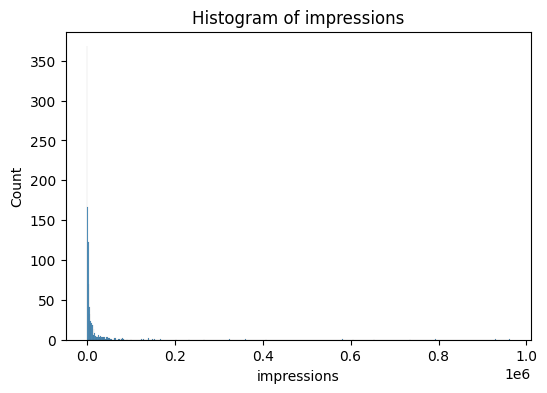

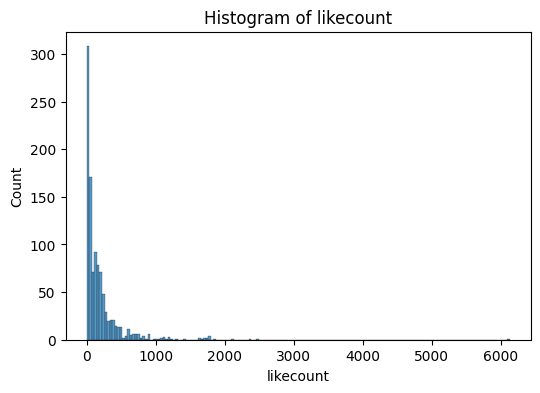

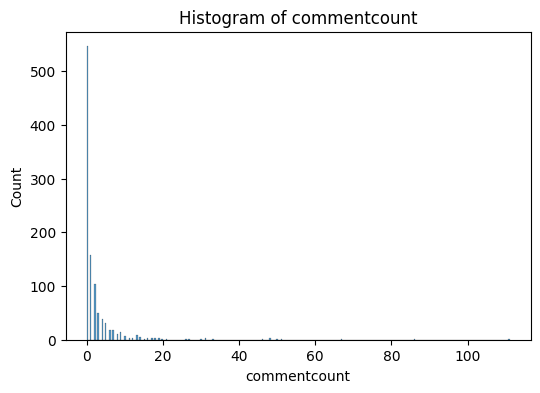

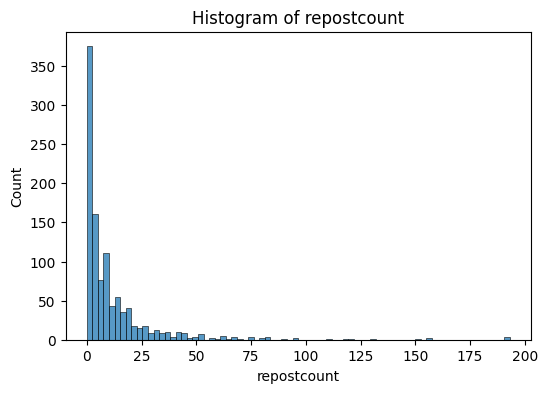

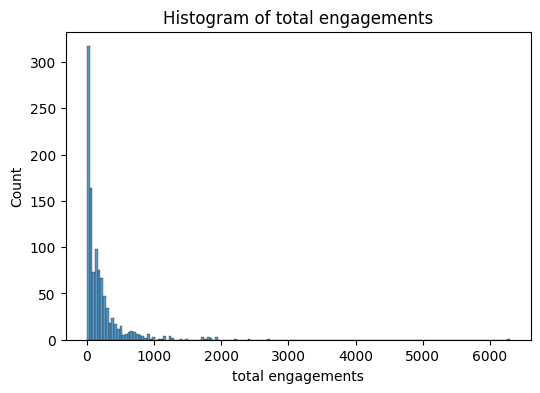

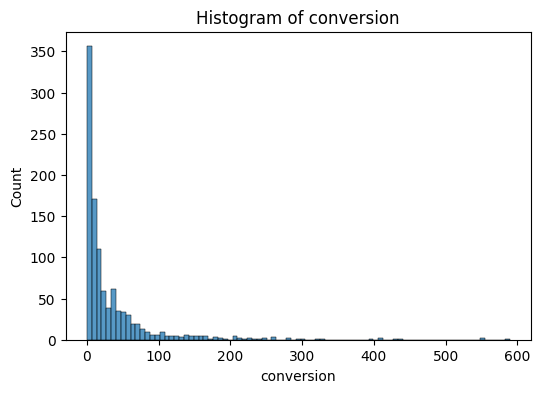

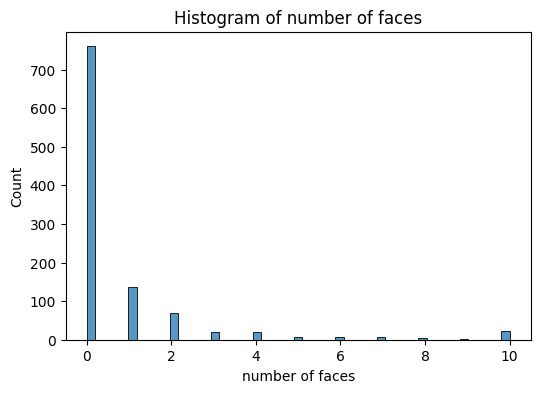

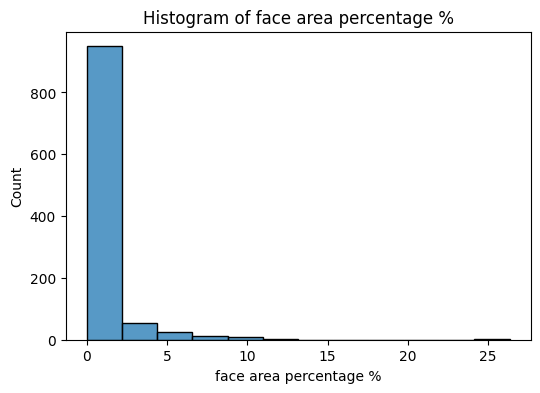

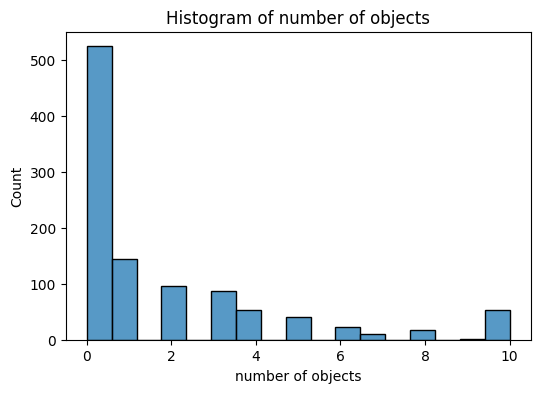

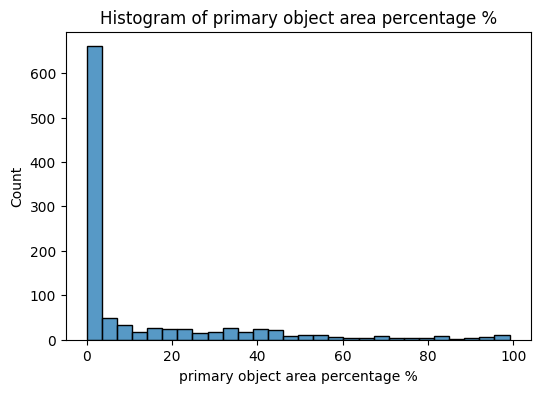

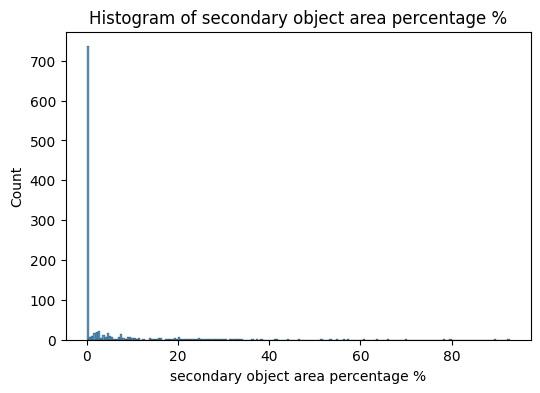

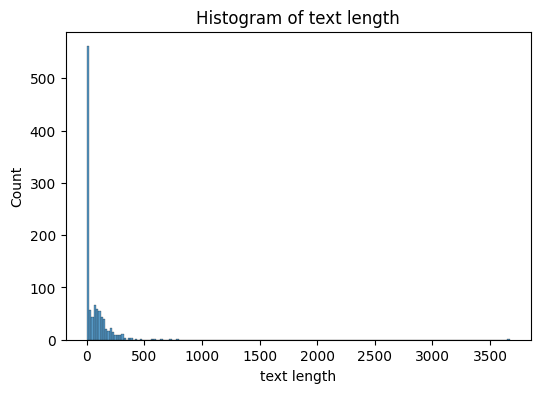

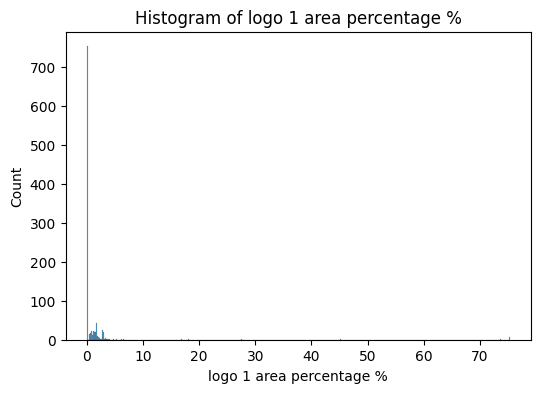

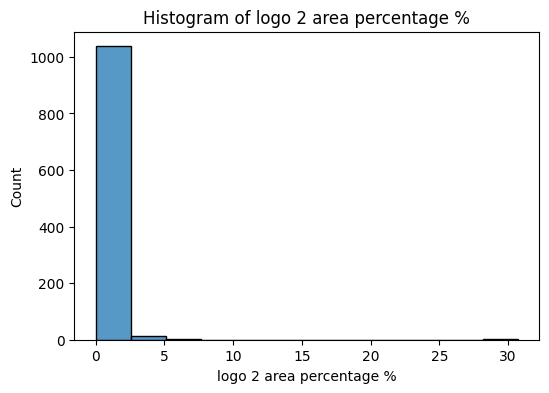

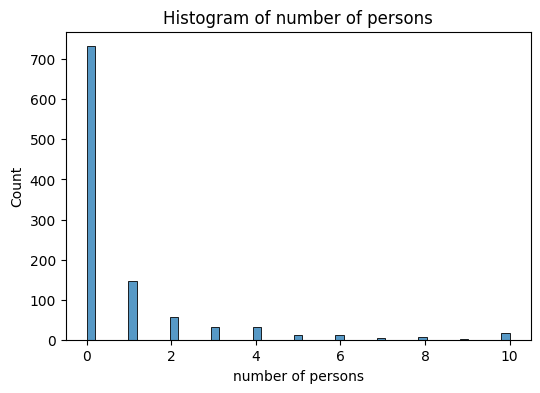

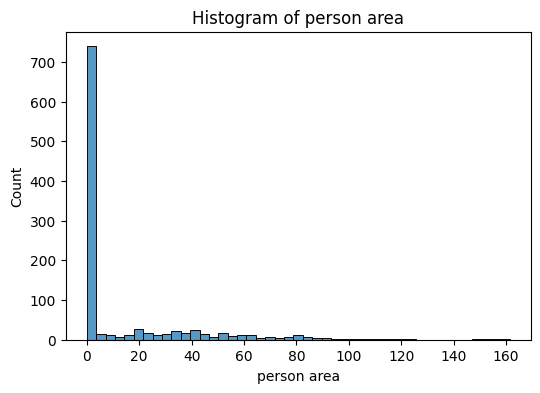

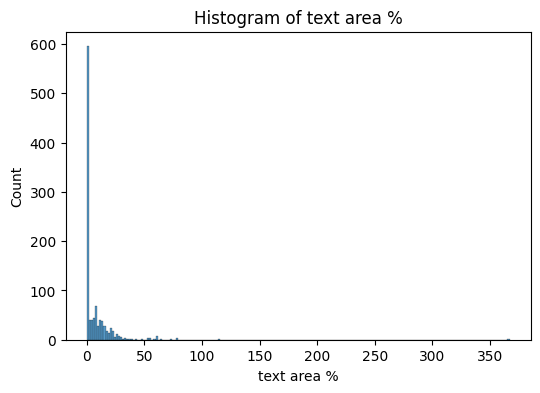

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dataset.csv')


print(data.info())
print(data.head())


data.fillna(0, inplace=True)


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column])
    plt.title(f'Histogram of {column}')
    plt.show()




## This correlation matrix is plotted to get to know how all the contents in the dataset has an effect on the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

<ipython-input-24-e17654b31c0b>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


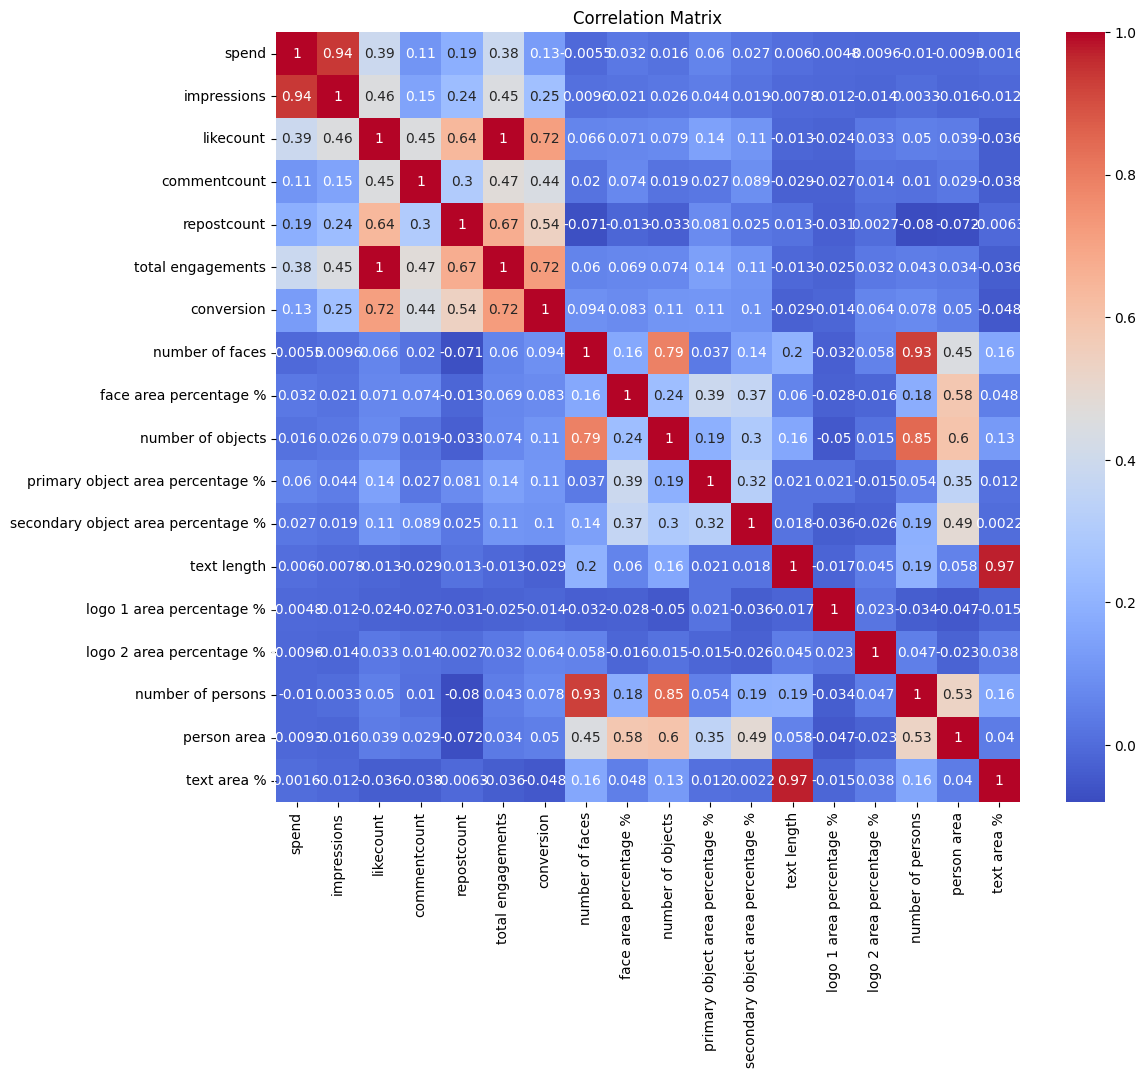

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('dataset.csv')

print(data.info())
print(data.head())

data.fillna(0, inplace=True)

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# MODEL BUILDING

## Like count model
### here we build a model usng linear regression
###based on the inputs from the correlation matrix we decide on the features that effect the target variable


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_csv('dataset.csv')
features = data[['impressions','total engagements','conversion','repostcount']]
target = data['likecount']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

like_model = LinearRegression()


like_model.fit(X_train, y_train)


predictions = like_model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 88.57711206122252


### Predicton code

In [40]:

new_data = pd.DataFrame({
    'impressions': [3880],
    'total engagements': [234],
    'conversion': [0],
    'repostcount': [9]
})


predicted_like = like_model.predict(new_data)


print(f"Predicted Like count: {predicted_like[0]}")


Predicted Like count: 222.73976566521873


## Comment count model
### here we build a model usng linear regression
###based on the inputs from the correlation matrix we decide on the features that effect the target variable


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd


data = pd.read_csv('dataset.csv')
features = data[['likecount','total engagements','conversion']]
target = data['commentcount']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

comment_model = LinearRegression()


comment_model.fit(X_train, y_train)

predictions = comment_model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 67.63670031709944


### Predicton code

In [48]:

new_data = pd.DataFrame({
    'likecount': [224],
    'total engagements': [234],
    'conversion': [0]
}
)


predicted_comment = comment_model.predict(new_data)


print(f"Predicted comment count: {predicted_comment[0]}")

Predicted comment count: 1.5739654110387447


## Repost count model
### here we build a model usng linear regression
###based on the inputs from the correlation matrix we decide on the features that effect the target variable



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_csv('dataset.csv')
features = data[['likecount','conversion','total engagements']]
target = data['repostcount']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


repost_model = LinearRegression()


repost_model.fit(X_train, y_train)

predictions = repost_model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 67.63670031710014


### Predicton code

In [60]:
new_data = pd.DataFrame({
    'likecount': [31],
    'conversion': [7],
    'total engagements': [33]
}
)


predicted_repost = repost_model.predict(new_data)


print(f"Predicted repost count: {predicted_repost[0]}")

Predicted repost count: 1.8953089114522061


## total engagement model
### here we build a model usng linear regression
###based on the inputs from the correlation matrix we decide on the features that effect the target variable


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_csv('dataset.csv')
features = data[['likecount','conversion','repostcount']]
target = data['total engagements']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


totalengagement_model = LinearRegression()

totalengagement_model.fit(X_train, y_train)


predictions = totalengagement_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 89.86723502012829


### Predicton code

In [82]:
new_data = pd.DataFrame({
    'likecount': [31],
    'conversion': [7],
    'repostcount': [2]
}
)


predicted_totalengagement = totalengagement_model.predict(new_data)


print(f"Predicted total engagement count: {predicted_totalengagement[0]}")

Predicted total engagement count: 33.68800110286641


## conversion model
### here we build a model usng linear regression
###based on the inputs from the correlation matrix we decide on the features that effect the target variable



In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

data = pd.read_csv('dataset.csv')
features = data[['total engagements','repostcount','likecount','commentcount','impressions']]
target = data['conversion']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


conversion_model = RandomForestRegressor()

conversion_model.fit(X_train, y_train)


predictions = conversion_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1017.9098113744075


### Predicton code

In [101]:
new_data = pd.DataFrame({


    'total engagements': [33],
    'repostcount':[2],
    'likecount': [31],
    'commentcount':[0],
    'impressions':[479]


}
)


predicted_conversion = conversion_model.predict(new_data)


print(f"Predicted conversion count: {predicted_conversion[0]}")

Predicted conversion count: 7.32


## Here i save the model using joblib library
[Here you can find the models and other documents](https://drive.google.com/drive/folders/114f0iYmx1rUw0-kw7Yd0J8sTw-3qfy0Z?usp=sharing)

In [103]:
import joblib
joblib.dump(like_model,'/content/drive/MyDrive/models/like_model.pkl')
joblib.dump(comment_model,'/content/drive/MyDrive/models/comment_model.pkl')
joblib.dump(repost_model,'/content/drive/MyDrive/models/repost_model.pkl')
joblib.dump(totalengagement_model,'/content/drive/MyDrive/models/totalengagement_model.pkl')
joblib.dump(conversion_model,'/content/drive/MyDrive/models/conversion_model.pkl')

['/content/drive/MyDrive/models/conversion_model.pkl']

# Predicting dataset for final evaluation

# Like count

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('dataset.csv')
features = data[['impressions','spend','primary object area percentage %']]
target = data['likecount']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

like_model_2 = RandomForestRegressor()


like_model_2.fit(X_train, y_train)


predictions = like_model_2.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 54531.7407985782


In [24]:
imp=float(input("impression: "))
spend=float(input("spend: "))
primary=float(input("primary object area percentage %: "))
new_data = pd.DataFrame({
    'impressions': [imp],
    'spend': [spend],
    'primary object area percentage %':[primary]

})


predicted_like = like_model_2.predict(new_data)


print(f"Predicted Like count: {predicted_like[0]}")

impression: 479
spend: 5.85
primary object area percentage %: 0
Predicted Like count: 29.96


In [6]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

predictions = like_model_2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 53678.932529857826
R-squared: 0.42939119381099355
Mean Absolute Error: 116.12379146919433


In [8]:
import joblib
joblib.dump(like_model_2,"/content/drive/MyDrive/models/models for final dataset evaluation/likecount_model.pkl")

['/content/drive/MyDrive/models/models for final dataset evaluation/likecount_model.pkl']

# Comment count

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('dataset.csv')
features = data[['impressions','likecount','spend']]
target = data['commentcount']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

comment_model_2 = RandomForestRegressor()


comment_model_2.fit(X_train, y_train)


predictions = comment_model_2.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 72.24930616113744


In [38]:
imp=float(input("impression: "))
like=float(input("like: "))
spend=float(input("spend: "))

new_data = pd.DataFrame({
    'impressions': [imp],
    'likecount':[like],
    'spend': [spend]

})


predicted_comment_count = comment_model_2.predict(new_data)


print(f"Predicted comment count: {predicted_comment_count[0]}")

impression: 3880
like: 224
spend: 1.8
Predicted comment count: 1.63


In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

predictions = comment_model_2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 72.24930616113744
R-squared: 0.35937373963412367
Mean Absolute Error: 3.011090047393365


# Repostcount


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('dataset.csv')
features = data[['impressions','likecount','spend','commentcount']]
target = data['repostcount']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

repostcount2_model = RandomForestRegressor()


repostcount2_model.fit(X_train, y_train)


predictions = repostcount2_model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 150.48653744075827


In [45]:
imp=float(input("impression: "))
like=float(input("like: "))
spend=float(input("spend: "))
comment=float(input("comment: "))
new_data = pd.DataFrame({
    'impressions': [imp],
    'likecount':[like],
    'spend': [spend],
    'commentcount':[comment]
 })


predicted_repostcount = repostcount2_model.predict(new_data)


print(f"Predicted repost count: {predicted_repostcount[0]}")

impression: 3880
like: 224
spend: 1.8
comment: 1
Predicted comment count: 12.28


In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

predictions = repostcount2_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 150.48653744075827
R-squared: 0.2266590900129556
Mean Absolute Error: 5.935734597156398


# total engagement

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('dataset.csv')
features = data[['impressions','likecount','spend','commentcount','repostcount','primary object area percentage %']]
target = data['total engagements']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

total_engagement_model2 = RandomForestRegressor()


total_engagement_model2.fit(X_train, y_train)


predictions = total_engagement_model2.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 311.8275687203795


In [52]:
imp=float(input("impression: "))
like=float(input("like: "))
spend=float(input("spend: "))
report=float(input("repost: "))
comment=float(input("comment: "))
primary=float(input("primary object area: "))
new_data = pd.DataFrame({
    'impressions': [imp],
    'likecount':[like],
    'spend': [spend],
    'commentcount':[comment],
    'repostcount':[report],
    'primary object area percentage %':[primary]

 })


predicted_total_engagement = total_engagement_model2.predict(new_data)


print(f"Predicted total engagement count: {predicted_total_engagement[0]}")

impression: 479
like: 31
spend: 5.85
repost: 2
comment: 0
primary object area: 0
Predicted total engagement count: 33.36


In [53]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

predictions = total_engagement_model2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 311.8275687203795
R-squared: 0.9969682234547013
Mean Absolute Error: 5.482085308056872


# conversion

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('dataset.csv')
features = data[['impressions','likecount','spend','commentcount','repostcount','primary object area percentage %','total engagements','number of objects']]
target = data['conversion']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

conversion_model_2 = RandomForestRegressor()


conversion_model_2.fit(X_train, y_train)


predictions = conversion_model_2.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1011.4667810426539


In [56]:
imp=float(input("impression: "))
like=float(input("like: "))
spend=float(input("spend: "))
report=float(input("repost: "))
comment=float(input("comment: "))
total=float(input("primary total engagement: "))
num_object=float(input("number of objects: "))
primary=float(input("primary object area: "))
new_data = pd.DataFrame({
    'impressions': [imp],
    'likecount':[like],
    'spend': [spend],
    'commentcount':[comment],
    'repostcount':[report],
    'primary object area percentage %':[primary],
    'total engagements':[total],
    'number of objects':[num_object]


 })


predicted_conversion = conversion_model_2.predict(new_data)


print(f"Predicted conversion: {predicted_conversion[0]}")

impression: 479
like: 31
spend: 5.85
repost: 2
comment: 0
primary total engagement: 33
number of objects: 0
primary object area: 0
Predicted conversion: 7.01


In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

predictions = conversion_model_2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1011.4667810426539
R-squared: 0.7509127551152937
Mean Absolute Error: 16.09109004739336


# saving the model to drive

In [58]:
import joblib
joblib.dump(like_model_2,'/content/drive/MyDrive/models/models for final dataset evaluation/like_model_2.pkl')
joblib.dump(comment_model_2,'/content/drive/MyDrive/models/models for final dataset evaluation/comment_model_2.pkl')
joblib.dump(repostcount2_model,'/content/drive/MyDrive/models/models for final dataset evaluation/repostcount2_model.pkl')
joblib.dump(total_engagement_model2,'/content/drive/MyDrive/models/models for final dataset evaluation/total_engagement_model2.pkl')
joblib.dump(conversion_model_2,'/content/drive/MyDrive/models/models for final dataset evaluation/conversion_model_2.pkl')

['/content/drive/MyDrive/models/models for final dataset evaluation/conversion_model_2.pkl']